# GMM(Gaussian Mixture model)
#### GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞어서 생성된 것이라 가정하에 군집화를 수행하는 방식이다.
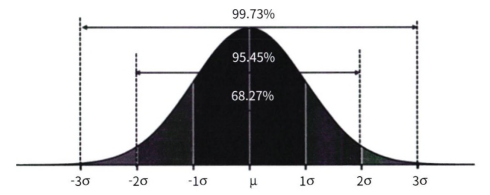

#### GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주한다.
#### 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출한다.

#### 아래와 같이 3개의 가우시안 분포 A, B, C를 가진 데이터 세트가 있다고 가정하자
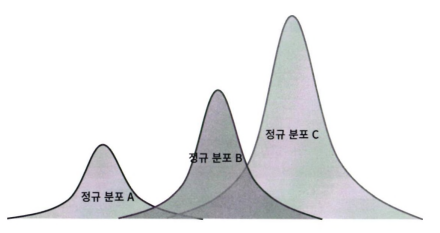
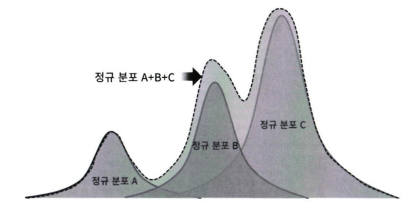
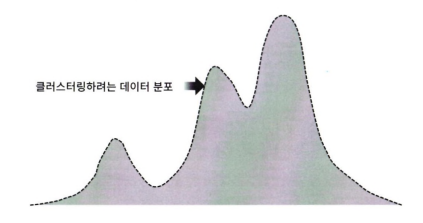

#### 전체 데이터 세트는 서로 다른 정규 분포 형태를 가진 여러 가지 확률 분포 곡성으로 구성될 수 있으며, 서루 다른 정규 분포에 기반해 군집화를 수행하는 것이 GMM 군집화 방식이다.
#### 가령 1000개의 데이터가 있다면 이를 구성하는 여러 개의 정규 분포 곡선을 추출하고, 개별 데이터가 이 중 어떤 정규 분포에 속하는지 결정하는 방식이다.
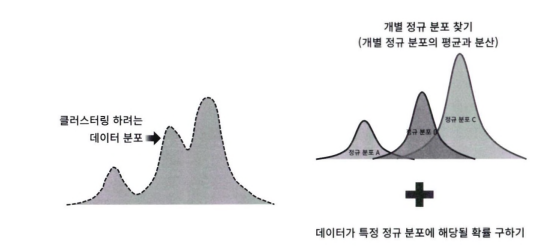
#### 이와 같은 방식을 GMM에서 모수 추정이라 하는데, 대표적으로 2가지를 추청한다.
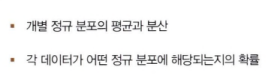

#### 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximization) 방법을 적용한다.
#### 사이킷런에서는 EM 방식을 통한 모수 추정 군집화를 GaussianMixture 클래스를 지원한다.

## GMM을 이용한 붓꽃 데이터 세트 군집화
#### GMM은 확률 기반 군집화이고, K-평균은 거리 기반 군집화이다.
#### 이번에는 두 가지 방식을 비교하여 수행한다.

In [1]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length','sepal_width','petal_length','petal_width']

# 보다 편리한 데이타 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF['target'] = iris.target

#### GaussianMixture 객체의 가장 중요한 초기화 파라미터는 n_components이다.
#### n_components는 모델의 총 개수이고, K-평균의 n_clusters와 같이 군집의 개수를 정하는 중요한 역할을 한다.

In [4]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### 타켓 0, 2는 모두 잘 매핑이 되었고, 타켓 1은 90퍼센트로 매핑이 되었다.

In [5]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


#### 해당 붓꽃 데이터 세트는 GMM 군집화가 더 효과적이지만, K-평균은 평균 거리 중심으로 중심을 이동하면서 군집화를 수행하므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우 매우 효과적이다.

## GMM과 K-평균의 비교
#### make_blobs()의 군집의 수를 3개로 하되, cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 하여 KMeans를 적용하면 아래와 같이 효과적이다.
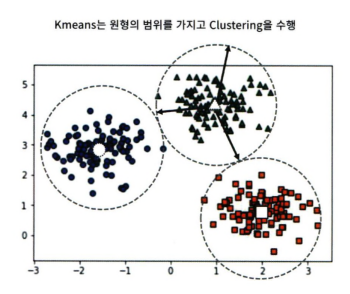

#### 하지만, 데이터 세트가 퍼져있다면 어떻게 될까?

In [6]:
### 클러스터 결과를 담은 DataFrame과 사이킷런의 Cluster 객체등을 인자로 받아 클러스터링 결과를 시각화하는 함수  
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

#### 아래와 같이 데이터 세트가 있다

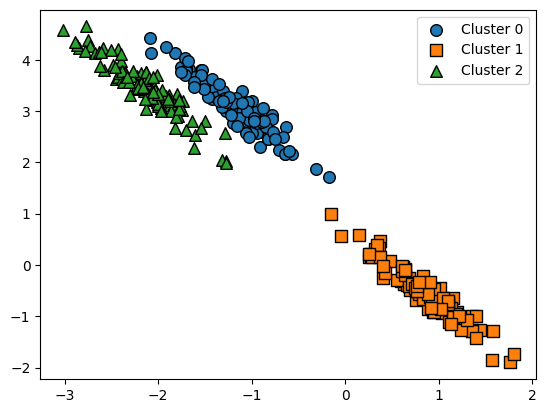

In [7]:
from sklearn.datasets import make_blobs

# make_blobs() 로 300개의 데이터 셋, 3개의 cluster 셋, cluster_std=0.5 을 만듬. 
X, y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

# 길게 늘어난 타원형의 데이터 셋을 생성하기 위해 변환함. 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs( ) 의 y 결과 값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
# 생성된 데이터 셋을 target 별로 다른 marker 로 표시하여 시각화 함. 
visualize_cluster_plot(None, clusterDF, 'target', iscenter=False)

#### 해당 데이터 세트에 KMeans 군집화를 사용하면 정확성이 떨어진다.

C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


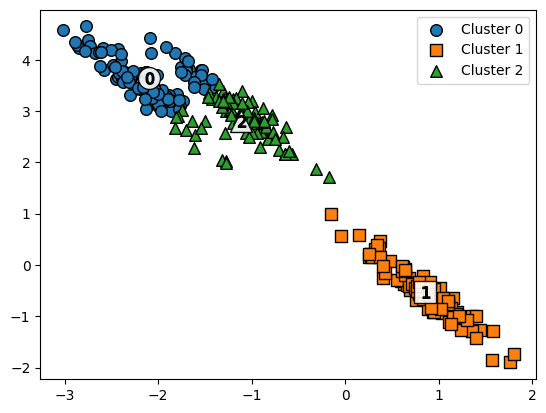

In [8]:
# 3개의 Cluster 기반 Kmeans 를 X_aniso 데이터 셋에 적용 
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label',iscenter=True)

#### KMeans의 경우 평균 거리 기반으로 군집화를 수행하므로 같은 거리상 원형으로 군집을 구성하면서 길쭉한 방향으로 데이터가 밀집해 있는 경우 최적의 군집화를 수행하기 어렵다.
#### 다음은 GMM 군집화를 수행한다.

C:\Users\tlsdy\anaconda3\envs\ML\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


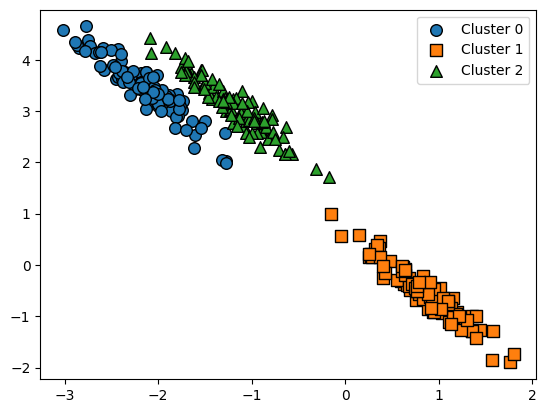

In [9]:
# 3개의 n_components기반 GMM을 X_aniso 데이터 셋에 적용 
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정. 
visualize_cluster_plot(gmm, clusterDF, 'gmm_label',iscenter=False)

#### 데이터가 분포된 방향에 따라 정확하게 군집화되었다. 하지만 GMM은 군집 중심 좌표를 구할 수 없기 때문에 군집 중심 표현은 불가능하다.

In [10]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('\n### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


#### GMM의 경우 KMeans 보다 유연하게 다양한 데이터 세트에 잘 적용한다는 장점이 있지만 군집화를 위한 시간이 오래 걸린다는 단점도 있다.